# Exploring One-Dimensional Data
one-dimensional dataset is usually a collection of numbers. An obvious first step is to compute a few summary statistics, like how many data points you have, the smallest, the largest, the mean, and the standard deviation.

In [1]:
L = [1,3,2,0,123,23]
for i in range(20):
    L.append(i)
print(L)
print(len(L))
print(max(L))
print(min(L))

[1, 3, 2, 0, 123, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
26
123
0


## A good next step is to create a histogram, in which you group your data into discrete buckets and count how many points fall into each bucket

In [2]:
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt
def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""    
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):    
    histogram = make_histogram(points, bucket_size)    
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)    
    plt.title(title)

## Consider the following two datasets: uniform and normal, what is there mean and statndard deviation?

In [3]:
import random
import numpy as np


random.seed(233)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution created by numpy
normal = list(np.random.normal(0, 57, 10000))
#normal = [57 * inverse_normal_cdf(random.random())          
#          for _ in range(10000)]

## However, they have very different distributions, let's take a look at them by ploting it.

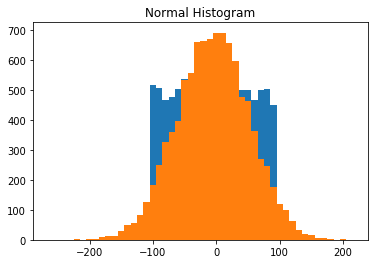

In [4]:
plot_histogram(uniform, 10, "Uniform Histogram")
plot_histogram(normal, 10, "Normal Histogram")

# Two dimensional data
What kind of data is two dimensional? Let's create it by ourself

In [14]:
def random_normal(mean, std, total=1) ->float:
    """ return random draw from normal distribution """
    return np.random.normal(mean,std,total)

xs = list(random_normal(0,10,1000))
ys1 = [x + random_normal(0,10).item() for x in xs]
ys2 = [-x + random_normal(0,10).item() for x in xs]

#print(ys1)
    

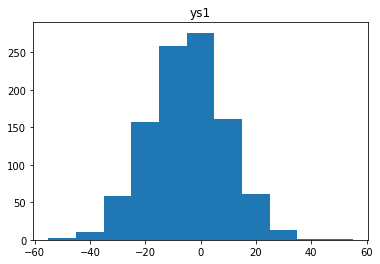

In [15]:
plot_histogram(ys1,10, "ys1")


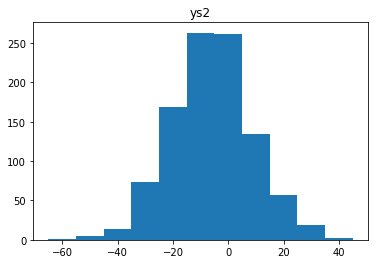

In [16]:
plot_histogram(ys2,10, "ys2")

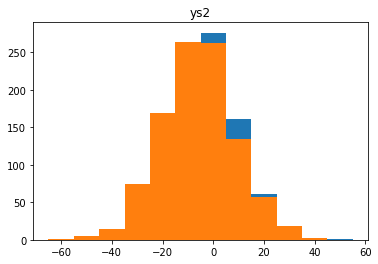

In [17]:
plot_histogram(ys1,10, "ys1")
plot_histogram(ys2,10, "ys2")

## It seems they have similar distribution, but actually they are different

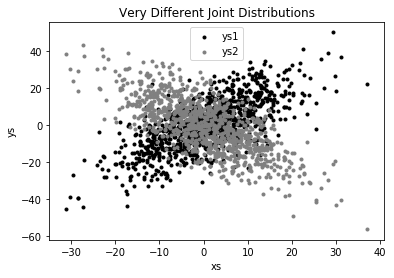

In [18]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [19]:
np.corrcoef(ys1,ys2)

array([[ 1.        , -0.50820192],
       [-0.50820192,  1.        ]])

# Many dimensions
Once you have many dimensional data, what can you do to understand the relationship?

In [ ]:
# One method is to calculate the pairwise correlation matrix of row[i] and row[j] or for each column. Another method is visualize them. Let's try

In [25]:
corr_data = [[200 * random.random() - 100 for _ in range(1000)],list(random_normal(0,10,1000)), 
             list(-1*random_normal(0,10,1000)),list(20-random_normal(0,10,1000))]
print(corr_data)

[[-10.07037320130648, 7.54357728556117, 84.26572847019293, 37.7188446576464, 53.45221950709595, -82.04716628028241, 33.910950529788295, 4.363057331682455, 82.20555440861361, 65.47891296722028, -44.26978927080609, -69.20877093131455, -48.694578242387855, 77.39122074538395, 64.50492070988153, -63.568310359919835, 94.19208746851965, -27.313487933244616, -73.85048949306356, 87.15167094618855, -70.775987523308, -3.1582444952727826, -22.17973392171774, -53.67379946387514, -43.11250563378535, 29.62649043454823, 91.2626176052851, 56.014266514744406, -70.18051848992874, -59.16711972662536, 50.472128583031065, -66.34162207635566, -96.11297474718448, -72.54088746100021, -63.22992924604325, 67.943141677814, 40.39572713874432, -57.96230477017499, -33.6209209388858, -87.9146533814712, -51.49453883191208, -2.8353303705110307, 38.921437814049256, 41.870615976947846, 80.06650820299444, 87.51971344086681, 8.896196655562846, 0.38243142266334473, -42.49310578640249, 50.68694964434226, 75.14354376028359, -

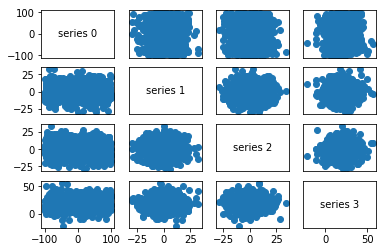

In [26]:
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)      # plt.subplots would allow us to create subplots

for i in range(num_vectors):
    for j in range(num_vectors):

        # Scatter column_j on the x-axis vs. column_i on the y-axis
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

        # unless i == j, in which case show the series name
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                xycoords='axes fraction',
                                ha="center", va="center")

        # Then hide axis labels except left and bottom charts
        if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

# Fix the bottom-right and top-left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())

plt.show()

## Now could you try to create another corr_data with different kind of data, and run your script to draw correlation pictures?

## How to understand multidimentional data like Stock? For example,
AAPL,6/20/2014,90.91 <br>
MSFT,6/20/2014,41.68<br>
FB,6/20/3014,64.5<br>
AAPL,6/19/2014,91.86<br>
MSFT,6/19/2014,n/a<br>
FB,6/19/2014,64.34<br>
Any ideas to represent this data? 

## One way to represent this is by using dictionary

In [28]:
import datetime

stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}

## Issues: need a lot of memory, accessing things by dict key is error-prone:
#oops, typo
stock_price['cosing_price'] = 103.06

## Another solution: namedtuple class, tuple with named slots. Like regular tuples, namedtuples are immutable, which means that you can’t modify their values once they’re created. Occasionally this will get in our way, but mostly that’s a good thing. Let's see the following example:

In [30]:
from collections import namedtuple

StockPrice = namedtuple('StockPrice', ['symbol', 'date', 'closing_price'])
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03

# now let's solve the type annotation issue
from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'               # so now you have to use price.symbol, this will avoid your typos.
assert price.closing_price == 106.03
assert price.is_high_tech()

## Cleaning and Munging.
Real-world data is dirty. Often you’ll have to do some work on it before you can use it. For example, you may need to convert strings to floats or ints, check missing values and outliers and bad data:
closing_price = float(row[2])
Let's write a function to do the parsing

In [34]:
from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                      date=parse(date).date(),
                      closing_price=float(closing_price))

# Now test our function
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

## How about bad data? Please try the following:

In [35]:
stock = parse_row(["MSFT", "2018-12-14", "oh my data"])

ValueError: could not convert string to float: 'oh my data'

## Maybe it should return None instead of crash? Let's see this function:

In [36]:
from typing import Optional
import re

def try_parse_row(row: List[str]) -> Optional[StockPrice]:
    symbol, date_, closing_price_ = row

    # Stock symbol should be all capital letters
    if not re.match(r"^[A-Z]+$", symbol):
        return None

    try:
        date = parse(date_).date()
    except ValueError:
        return None

    try:
        closing_price = float(closing_price_)
    except ValueError:
        return None

    return StockPrice(symbol, date, closing_price)

# Should return None for errors
assert try_parse_row(["MSFT0", "2018-12-14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12--14", "106.03"]) is None
assert try_parse_row(["MSFT", "2018-12-14", "x"]) is None

# But should return same as before if data is good
assert try_parse_row(["MSFT", "2018-12-14", "106.03"]) == stock

## Try to create a CSV file "comma_delimited_stock_prices.csv" with the following data:<br>
AAPL,6/20/2014,90.91 <br>
MSFT,6/20/2014,41.68 <br>
FB,6/20/3014,64.5<br>
AAPL,6/19/2014,91.86<br>
MSFT,6/19/2014,n/a<br>
FB,6/19/2014,64.34<br>
And then run the following function

In [38]:
import csv

data: List[StockPrice] = []

with open("comma_delimited_stock_prices.csv") as f:
    reader = csv.reader(f)
    for row in reader:
        maybe_stock = try_parse_row(row)
        if maybe_stock is None:
            print(f"skipping invalid row: {row}")
        else:
            data.append(maybe_stock)

skipping invalid row: ['MSFT', '6/19/2014', 'n/a']


## Think about what else error in your data? Any outliers? 

# Manipulating Data
One of the most important skills of a data scientist is manipulating data. It’s more of a general approach than a specific technique, so we’ll just work through a handful of examples to give you the flavor of it. <br>
Continue the stock data example, now I want to know the highest-ever closing price for AAPL, what can we do? 

In [40]:
max_aapl_price = max(StockPrice.closing_price
                     for StockPrice in data
                     if StockPrice.symbol == "AAPL")
print(max_aapl_price)

91.86


## More generally, how to find the highest-ever closing price for each stock? 
Idea: Create a dict to keep track of highest prices (we’ll use a defaultdict that returns minus infinity for missing values, since any price will be greater than that).<br>
Iterate over our data, updating it.

In [42]:
from collections import defaultdict

max_prices: Dict[str, float] = defaultdict(lambda: float('-inf'))

for sp in data:
    symbol, closing_price = sp.symbol, sp.closing_price
    if closing_price > max_prices[symbol]:
        max_prices[symbol] = closing_price

print(max_prices)

defaultdict(<function <lambda> at 0x1199ea598>, {'AAPL': 91.86, 'MSFT': 41.68, 'FB': 64.5})


## Now we coud do some more complicated things
Such as the largest and smallest changes? The per-day change could be calculated by: price_today / price_yesterday - 1. Ideas?  <br>

1. Order the prices by date. <br>

2. Use zip to get (previous, current) pairs. <br>

3. Turn the pairs into new “percent change” rows. <br>


In [43]:
from typing import List
from collections import defaultdict

# Collect the prices by symbol
prices: Dict[str, List[StockPrice]] = defaultdict(list)

for sp in data:
    prices[sp.symbol].append(sp)


In [44]:
# Order the prices by date. 
prices = {symbol: sorted(symbol_prices)
          for symbol, symbol_prices in prices.items()}

In [51]:
# compute a sequence of day-over-day changes
def pct_change(yesterday: StockPrice, today: StockPrice) -> float:
    return today.closing_price / yesterday.closing_price - 1

class DailyChange(NamedTuple):
    symbol: str
    date: datetime.date
    pct_change: float

def day_over_day_changes(prices: List[StockPrice]) -> List[DailyChange]:
    """
    Assumes prices are for one stock and are in order
    """
    return [DailyChange(symbol=today.symbol,
                        date=today.date,
                        pct_change=pct_change(yesterday, today))
            for yesterday, today in zip(prices, prices[1:])]

# now get all of them
all_changes = [change
               for symbol_prices in prices.values()
               for change in day_over_day_changes(symbol_prices)]
print(all_changes)

[DailyChange(symbol='AAPL', date=datetime.date(2014, 6, 20), pct_change=-0.0103418245155672), DailyChange(symbol='FB', date=datetime.date(3014, 6, 20), pct_change=0.0024867889337891746)]


In [52]:
# now we could find the largest and smallest
max_change = max(all_changes, key=lambda change: change.pct_change)
print(max_change.symbol)
print(max_change.date)
print(max_change.pct_change)

min_change = min(all_changes, key=lambda change: change.pct_change)
print(min_change.symbol)
print(min_change.date)
print(min_change.pct_change)

FB
3014-06-20
0.0024867889337891746
AAPL
2014-06-20
-0.0103418245155672


In [54]:
# Now we could try to use this to find out which month is the best to invest? 
# Let's just check the average daily change by month
changes_by_month: List[DailyChange] = {month: [] for month in range(1, 13)}

for change in all_changes:
    changes_by_month[change.date.month].append(change)

avg_daily_change = {
    month: sum(change.pct_change for change in changes) / len(changes)
    for month, changes in changes_by_month.items()
}

# If October is the best month, we could find it now
#assert avg_daily_change[10] == max(avg_daily_change.values())


ZeroDivisionError: division by zero

# Rescaling
Many techniques are sensitive to the scale of your data. For example, imagine that you have a dataset consisting of the heights and weights of hundreds of data scientists, and that you are trying to identify clusters of body sizes. 
Like A has height and weight 63, 120, B has height and weight 67, 200, etc. You could directly compare but maybe height is in the range of 0 and 100, but weight in the range of 0 and 300, they are not in the same scale, the general idea is to rescale each data so they are all in the distribution of mean 0 and standard deviation 1, please read book for example of details. 

# tqdm
Frequently we’ll end up doing computations that take a long time. When you’re doing such work, you’d like to know that you’re making progress and how long you should expect to wait. <br>
You should first install: python -m pip install tqdm

In [55]:
import tqdm

for i in tqdm.tqdm(range(100)):
    # do something slow
    _ = [random.random() for _ in range(1000000)]

100%|██████████| 100/100 [00:12<00:00,  8.38it/s]


In [ ]:
# Practice the following example
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]

    with tqdm.trange(3, n) as t:
        for i in t:
            # i is prime if no smaller prime divides it
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)

            t.set_description(f"{len(primes)} primes")

    return primes

my_primes = primes_up_to(100_000)

6802 primes:  68%|██████▊   | 68375/99997 [00:48<00:24, 1306.79it/s]